** Uni-Net .vs. Norm-net **

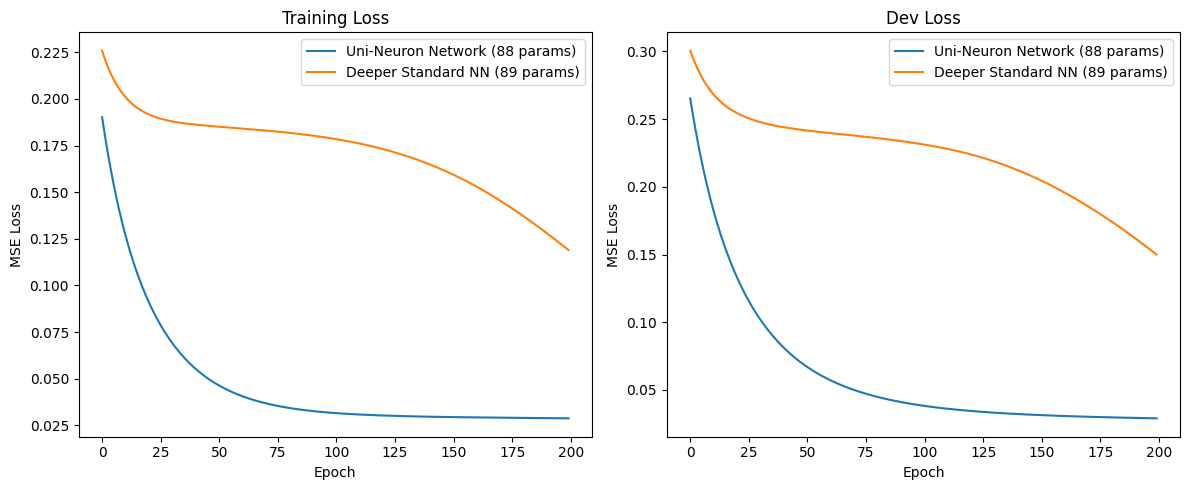


Uni-Neuron Network (88 params):
Training Loss: 0.0287
Dev Loss: 0.0290
Test Loss: 0.0237
Training Time: 0.23 seconds

Deeper Standard NN (89 params):
Training Loss: 0.1190
Dev Loss: 0.1500
Test Loss: 0.1337
Training Time: 0.17 seconds

Example Input (x1, x2): [-0.3178673  -0.77305296]
True Output (y1, y2): [ 0.28885969 -0.02194079]
Uni-Neuron Prediction: [ 0.0259667  -0.04151991]
Deeper Standard NN Prediction: [0.30225986 0.08120418]


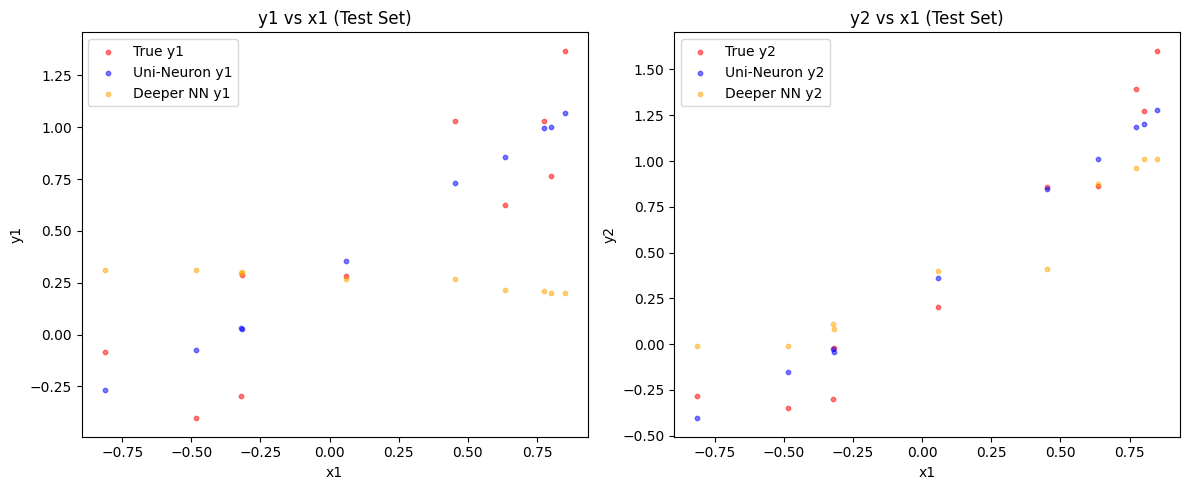

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate synthetic data
np.random.seed(42)
n_samples = 100
X = np.random.uniform(-1, 1, (n_samples, 2))
noise = np.random.normal(0, 0.05, (n_samples, 2))
Y = np.zeros((n_samples, 2))
Y[:, 0] = np.sin(X[:, 0]) + X[:, 1]**2 + noise[:, 0]
Y[:, 1] = np.exp(X[:, 0]) - np.cos(X[:, 1]) + noise[:, 1]

# Split data
train_size = int(0.75 * n_samples)
dev_size = int(0.15 * n_samples)
X_train, Y_train = X[:train_size], Y[:train_size]
X_dev, Y_dev = X[train_size:train_size + dev_size], Y[train_size:train_size + dev_size]
X_test, Y_test = X[train_size + dev_size:], Y[train_size + dev_size:]

# Activation function
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return np.where(x > 0, 1, 0)

# Uni-Neuron Network (88 parameters, 3 hidden layers)
class UniNeuronNetwork:
    def __init__(self):
        self.weights = {
            'in_h1': np.random.randn(2, 2) * 0.1, 'in_h2': np.random.randn(2, 4) * 0.1,
            'in_h3': np.random.randn(2, 4) * 0.1, 'in_out': np.random.randn(2, 2) * 0.1,
            'h1_h2': np.random.randn(2, 4) * 0.1, 'h1_h3': np.random.randn(2, 4) * 0.1,
            'h1_out': np.random.randn(2, 2) * 0.1, 'h2_h3': np.random.randn(4, 4) * 0.1,
            'h2_out': np.random.randn(4, 2) * 0.1, 'h3_out': np.random.randn(4, 2) * 0.1
        }
        self.biases = {
            'h1': np.zeros(2), 'h2': np.zeros(4), 'h3': np.zeros(4), 'out': np.zeros(2)
        }

    def forward(self, X):
        self.X = X
        self.z1 = X @ self.weights['in_h1'] + self.biases['h1']
        self.h1 = relu(self.z1)
        self.z2 = (X @ self.weights['in_h2'] + self.h1 @ self.weights['h1_h2'] + self.biases['h2'])
        self.h2 = relu(self.z2)
        self.z3 = (X @ self.weights['in_h3'] + self.h1 @ self.weights['h1_h3'] +
                   self.h2 @ self.weights['h2_h3'] + self.biases['h3'])
        self.h3 = relu(self.z3)
        self.out = (X @ self.weights['in_out'] + self.h1 @ self.weights['h1_out'] +
                    self.h2 @ self.weights['h2_out'] + self.h3 @ self.weights['h3_out'] +
                    self.biases['out'])
        return self.out

    def backward(self, X, Y, learning_rate=0.01):
        m = X.shape[0]
        dL_dout = (self.out - Y) / m
        self.weights['in_out'] -= learning_rate * (X.T @ dL_dout)
        self.weights['h1_out'] -= learning_rate * (self.h1.T @ dL_dout)
        self.weights['h2_out'] -= learning_rate * (self.h2.T @ dL_dout)
        self.weights['h3_out'] -= learning_rate * (self.h3.T @ dL_dout)
        self.biases['out'] -= learning_rate * np.sum(dL_dout, axis=0)
        dL_dh3 = dL_dout @ self.weights['h3_out'].T * relu_deriv(self.z3)
        self.weights['in_h3'] -= learning_rate * (X.T @ dL_dh3)
        self.weights['h1_h3'] -= learning_rate * (self.h1.T @ dL_dh3)
        self.weights['h2_h3'] -= learning_rate * (self.h2.T @ dL_dh3)
        self.biases['h3'] -= learning_rate * np.sum(dL_dh3, axis=0)
        dL_dh2 = (dL_dout @ self.weights['h2_out'].T + dL_dh3 @ self.weights['h2_h3'].T) * relu_deriv(self.z2)
        self.weights['in_h2'] -= learning_rate * (X.T @ dL_dh2)
        self.weights['h1_h2'] -= learning_rate * (self.h1.T @ dL_dh2)
        self.biases['h2'] -= learning_rate * np.sum(dL_dh2, axis=0)
        dL_dh1 = (dL_dout @ self.weights['h1_out'].T + dL_dh3 @ self.weights['h1_h3'].T +
                  dL_dh2 @ self.weights['h1_h2'].T) * relu_deriv(self.z1)
        self.weights['in_h1'] -= learning_rate * (X.T @ dL_dh1)
        self.biases['h1'] -= learning_rate * np.sum(dL_dh1, axis=0)

# Deeper Standard NN (89 parameters, 5 hidden layers)
class DeeperStandardNN:
    def __init__(self):
        self.weights = {
            'in_h1': np.random.randn(2, 4) / np.sqrt(2), 'h1_h2': np.random.randn(4, 4) / np.sqrt(4),
            'h2_h3': np.random.randn(4, 5) / np.sqrt(4), 'h3_h4': np.random.randn(5, 3) / np.sqrt(5),
            'h4_h5': np.random.randn(3, 2) / np.sqrt(3), 'h5_out': np.random.randn(2, 2) / np.sqrt(2)
        }
        self.biases = {
            'h1': np.zeros(4), 'h2': np.zeros(4), 'h3': np.zeros(5), 'h4': np.zeros(3),
            'h5': np.zeros(2), 'out': np.zeros(2)
        }

    def forward(self, X):
        self.X = X
        self.z1 = X @ self.weights['in_h1'] + self.biases['h1']
        self.h1 = relu(self.z1)
        self.z2 = self.h1 @ self.weights['h1_h2'] + self.biases['h2']
        self.h2 = relu(self.z2)
        self.z3 = self.h2 @ self.weights['h2_h3'] + self.biases['h3']
        self.h3 = relu(self.z3)
        self.z4 = self.h3 @ self.weights['h3_h4'] + self.biases['h4']
        self.h4 = relu(self.z4)
        self.z5 = self.h4 @ self.weights['h4_h5'] + self.biases['h5']
        self.h5 = relu(self.z5)
        self.out = self.h5 @ self.weights['h5_out'] + self.biases['out']
        return self.out

    def backward(self, X, Y, learning_rate=0.01):
        m = X.shape[0]
        dL_dout = (self.out - Y) / m
        dL_dh5 = dL_dout @ self.weights['h5_out'].T * relu_deriv(self.z5)
        self.weights['h5_out'] -= learning_rate * (self.h5.T @ dL_dout)
        self.biases['out'] -= learning_rate * np.sum(dL_dout, axis=0)
        dL_dh4 = dL_dh5 @ self.weights['h4_h5'].T * relu_deriv(self.z4)
        self.weights['h4_h5'] -= learning_rate * (self.h4.T @ dL_dh5)
        self.biases['h5'] -= learning_rate * np.sum(dL_dh5, axis=0)
        dL_dh3 = dL_dh4 @ self.weights['h3_h4'].T * relu_deriv(self.z3)
        self.weights['h3_h4'] -= learning_rate * (self.h3.T @ dL_dh4)
        self.biases['h4'] -= learning_rate * np.sum(dL_dh4, axis=0)
        dL_dh2 = dL_dh3 @ self.weights['h2_h3'].T * relu_deriv(self.z2)
        self.weights['h2_h3'] -= learning_rate * (self.h2.T @ dL_dh3)
        self.biases['h3'] -= learning_rate * np.sum(dL_dh3, axis=0)
        dL_dh1 = dL_dh2 @ self.weights['h1_h2'].T * relu_deriv(self.z1)
        self.weights['h1_h2'] -= learning_rate * (self.h1.T @ dL_dh2)
        self.biases['h2'] -= learning_rate * np.sum(dL_dh2, axis=0)
        self.weights['in_h1'] -= learning_rate * (X.T @ dL_dh1)
        self.biases['h1'] -= learning_rate * np.sum(dL_dh1, axis=0)

# Training function
def train(network, X_train, Y_train, X_dev, Y_dev, X_test, Y_test, epochs=2000, learning_rate=0.01):
    train_losses = []
    dev_losses = []
    start_time = time.time()
    for _ in range(epochs):
        output_train = network.forward(X_train)
        train_loss = np.mean((output_train - Y_train) ** 2) / 2
        train_losses.append(train_loss)
        network.backward(X_train, Y_train, learning_rate)
        output_dev = network.forward(X_dev)
        dev_loss = np.mean((output_dev - Y_dev) ** 2) / 2
        dev_losses.append(dev_loss)
    end_time = time.time()
    train_loss_final = train_losses[-1]
    dev_loss_final = dev_losses[-1]
    output_test = network.forward(X_test)
    test_loss_final = np.mean((output_test - Y_test) ** 2) / 2
    return train_losses, dev_losses, train_loss_final, dev_loss_final, test_loss_final, end_time - start_time

# Initialize and train networks
uni_net = UniNeuronNetwork()
deeper_net = DeeperStandardNN()

uni_train_losses, uni_dev_losses, uni_train_loss, uni_dev_loss, uni_test_loss, uni_time = train(
    uni_net, X_train, Y_train, X_dev, Y_dev, X_test, Y_test, epochs=200, learning_rate=0.05)
deeper_train_losses, deeper_dev_losses, deeper_train_loss, deeper_dev_loss, deeper_test_loss, deeper_time = train(
    deeper_net, X_train, Y_train, X_dev, Y_dev, X_test, Y_test, epochs=200, learning_rate=0.05)

# Plot Training and Dev Losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(uni_train_losses, label='Uni-Neuron Network (88 params)')
plt.plot(deeper_train_losses, label='Deeper Standard NN (89 params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(uni_dev_losses, label='Uni-Neuron Network (88 params)')
plt.plot(deeper_dev_losses, label='Deeper Standard NN (89 params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Dev Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Print all losses
print("\nUni-Neuron Network (88 params):")
print(f"Training Loss: {uni_train_loss:.4f}")
print(f"Dev Loss: {uni_dev_loss:.4f}")
print(f"Test Loss: {uni_test_loss:.4f}")
print(f"Training Time: {uni_time:.2f} seconds")

print("\nDeeper Standard NN (89 params):")
print(f"Training Loss: {deeper_train_loss:.4f}")
print(f"Dev Loss: {deeper_dev_loss:.4f}")
print(f"Test Loss: {deeper_test_loss:.4f}")
print(f"Training Time: {deeper_time:.2f} seconds")

# Example prediction
sample_idx = 0
x_sample = X_test[sample_idx:sample_idx+1]
y_true = Y_test[sample_idx]
uni_pred = uni_net.forward(x_sample)[0]
deeper_pred = deeper_net.forward(x_sample)[0]
print(f"\nExample Input (x1, x2): {x_sample[0]}")
print(f"True Output (y1, y2): {y_true}")
print(f"Uni-Neuron Prediction: {uni_pred}")
print(f"Deeper Standard NN Prediction: {deeper_pred}")

# Visualization using test data
x1_test = X_test[:, 0]
x2_test = X_test[:, 1]
y1_true_test = Y_test[:, 0]
y2_true_test = Y_test[:, 1]
y_test_pred_uni = uni_net.forward(X_test)
y_test_pred_deeper = deeper_net.forward(X_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1_test, y1_true_test, label='True y1', color='red', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_uni[:, 0], label='Uni-Neuron y1', color='blue', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_deeper[:, 0], label='Deeper NN y1', color='orange', alpha=0.5, s=10)
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('y1 vs x1 (Test Set)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x1_test, y2_true_test, label='True y2', color='red', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_uni[:, 1], label='Uni-Neuron y2', color='blue', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_deeper[:, 1], label='Deeper NN y2', color='orange', alpha=0.5, s=10)
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('y2 vs x1 (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

--------------

** UNI <=> Adjuestable NN **

--------------

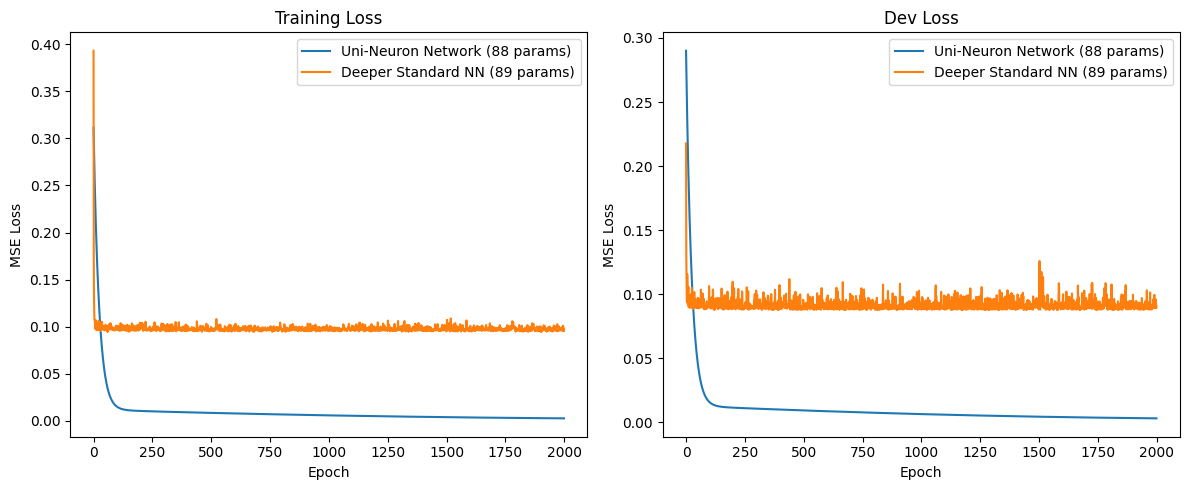


Uni-Neuron Network (88 parameters):
Training Loss: 0.0026
Dev Loss: 0.0030
Test Loss: 0.0030
Training Time: 1.98 seconds

Deeper Standard NN (89 parameters):
Training Loss: 0.0957
Dev Loss: 0.0896
Test Loss: 0.0487
Estimated Training Time: 200.19 seconds

Example Input (x1, x2): [0.9130028  0.47501672]
True Output (y1, y2): [1.28777568 1.60636641]
Uni-Neuron Prediction: [1.30555682 1.56349287]
Deeper Standard NN Prediction: [1.4109137 1.3929114]


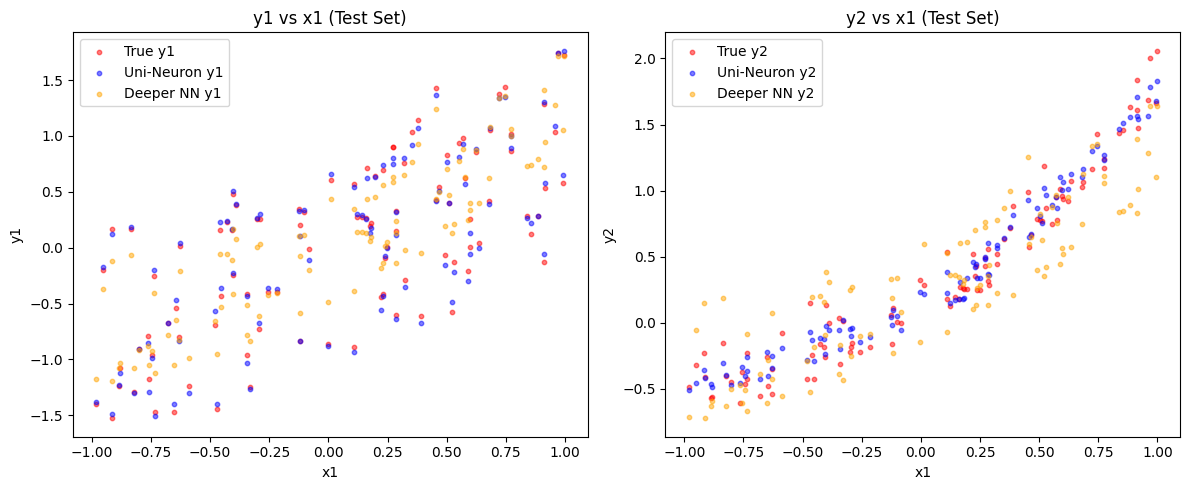

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras import layers, models

# Hyperparameters
LEARNING_RATE = 0.05
EPOCHS = 2000
NUM_SAMPLES = 1000

# Generate synthetic data
np.random.seed(42)
X = np.random.uniform(-1, 1, (NUM_SAMPLES, 2))
noise = np.random.normal(0, 0.05, (NUM_SAMPLES, 2))
Y = np.zeros((NUM_SAMPLES, 2))
Y[:, 0] = np.sin(X[:, 0]) + X[:, 1] + noise[:, 0]
Y[:, 1] = np.exp(X[:, 0]) - np.cos(X[:, 1]) + noise[:, 1]

# Split data
train_size = int(0.75 * NUM_SAMPLES)
dev_size = int(0.15 * NUM_SAMPLES)
X_train, Y_train = X[:train_size], Y[:train_size]
X_dev, Y_dev = X[train_size:train_size + dev_size], Y[train_size:train_size + dev_size]
X_test, Y_test = X[train_size + dev_size:], Y[train_size + dev_size:]

# Activation function for Uni-Neuron Network
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return np.where(x > 0, 1, 0)

# Uni-Neuron Network
class UniNeuronNetwork:
    def __init__(self):
        self.weights = {
            'in_h1': np.random.randn(2, 2) * 0.1, 'in_h2': np.random.randn(2, 4) * 0.1,
            'in_h3': np.random.randn(2, 4) * 0.1, 'in_out': np.random.randn(2, 2) * 0.1,
            'h1_h2': np.random.randn(2, 4) * 0.1, 'h1_h3': np.random.randn(2, 4) * 0.1,
            'h1_out': np.random.randn(2, 2) * 0.1, 'h2_h3': np.random.randn(4, 4) * 0.1,
            'h2_out': np.random.randn(4, 2) * 0.1, 'h3_out': np.random.randn(4, 2) * 0.1
        }
        self.biases = {
            'h1': np.zeros(2), 'h2': np.zeros(4), 'h3': np.zeros(4), 'out': np.zeros(2)
        }

    def forward(self, X):
        self.X = X
        self.z1 = X @ self.weights['in_h1'] + self.biases['h1']
        self.h1 = relu(self.z1)
        self.z2 = (X @ self.weights['in_h2'] + self.h1 @ self.weights['h1_h2'] + self.biases['h2'])
        self.h2 = relu(self.z2)
        self.z3 = (X @ self.weights['in_h3'] + self.h1 @ self.weights['h1_h3'] +
                   self.h2 @ self.weights['h2_h3'] + self.biases['h3'])
        self.h3 = relu(self.z3)
        self.out = (X @ self.weights['in_out'] + self.h1 @ self.weights['h1_out'] +
                    self.h2 @ self.weights['h2_out'] + self.h3 @ self.weights['h3_out'] +
                    self.biases['out'])
        return self.out

    def backward(self, X, Y, learning_rate=LEARNING_RATE):
        m = X.shape[0]
        dL_dout = (self.out - Y) / m
        self.weights['in_out'] -= learning_rate * (X.T @ dL_dout)
        self.weights['h1_out'] -= learning_rate * (self.h1.T @ dL_dout)
        self.weights['h2_out'] -= learning_rate * (self.h2.T @ dL_dout)
        self.weights['h3_out'] -= learning_rate * (self.h3.T @ dL_dout)
        self.biases['out'] -= learning_rate * np.sum(dL_dout, axis=0)
        dL_dh3 = dL_dout @ self.weights['h3_out'].T * relu_deriv(self.z3)
        self.weights['in_h3'] -= learning_rate * (X.T @ dL_dh3)
        self.weights['h1_h3'] -= learning_rate * (self.h1.T @ dL_dh3)
        self.weights['h2_h3'] -= learning_rate * (self.h2.T @ dL_dh3)
        self.biases['h3'] -= learning_rate * np.sum(dL_dh3, axis=0)
        dL_dh2 = (dL_dout @ self.weights['h2_out'].T + dL_dh3 @ self.weights['h2_h3'].T) * relu_deriv(self.z2)
        self.weights['in_h2'] -= learning_rate * (X.T @ dL_dh2)
        self.weights['h1_h2'] -= learning_rate * (self.h1.T @ dL_dh2)
        self.biases['h2'] -= learning_rate * np.sum(dL_dh2, axis=0)
        dL_dh1 = (dL_dout @ self.weights['h1_out'].T + dL_dh3 @ self.weights['h1_h3'].T +
                  dL_dh2 @ self.weights['h1_h2'].T) * relu_deriv(self.z1)
        self.weights['in_h1'] -= learning_rate * (X.T @ dL_dh1)
        self.biases['h1'] -= learning_rate * np.sum(dL_dh1, axis=0)

# Deeper Standard NN using TensorFlow Dense layers
class DeeperStandardNN:
    def __init__(self, units=[4, 4, 5, 3, 2]):
        self.model = models.Sequential([
            layers.Input(shape=(2,)),
            layers.Dense(units[0], activation='relu', kernel_initializer='he_normal'),
            layers.Dense(units[1], activation='relu', kernel_initializer='he_normal'),
            layers.Dense(units[2], activation='relu', kernel_initializer='he_normal'),
            layers.Dense(units[3], activation='relu', kernel_initializer='he_normal'),
            layers.Dense(units[4], activation='relu', kernel_initializer='he_normal'),
            layers.Dense(2)
        ])
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')

    def forward(self, X):
        return self.model.predict(X, verbose=0)

    def train(self, X_train, Y_train, X_dev, Y_dev, epochs=EPOCHS):
        history = self.model.fit(X_train, Y_train, epochs=epochs, batch_size=32,
                               validation_data=(X_dev, Y_dev), verbose=0)
        return history.history['loss'], history.history['val_loss']

# Training function for Uni-Neuron Network
def train_uni(network, X_train, Y_train, X_dev, Y_dev, X_test, Y_test, epochs=EPOCHS, learning_rate=LEARNING_RATE):
    train_losses = []
    dev_losses = []
    start_time = time.time()
    for _ in range(epochs):
        output_train = network.forward(X_train)
        train_loss = np.mean((output_train - Y_train) ** 2) / 2
        train_losses.append(train_loss)
        network.backward(X_train, Y_train, learning_rate)
        output_dev = network.forward(X_dev)
        dev_loss = np.mean((output_dev - Y_dev) ** 2) / 2
        dev_losses.append(dev_loss)
    end_time = time.time()
    train_loss_final = train_losses[-1]
    dev_loss_final = dev_losses[-1]
    output_test = network.forward(X_test)
    test_loss_final = np.mean((output_test - Y_test) ** 2) / 2
    return train_losses, dev_losses, train_loss_final, dev_loss_final, test_loss_final, end_time - start_time

# Calculate parameter counts
def count_uni_params():
    uni = UniNeuronNetwork()
    total_params = 0
    for w in uni.weights.values():
        total_params += np.prod(w.shape)
    for b in uni.biases.values():
        total_params += b.size
    return total_params

def count_deeper_params():
    deeper = DeeperStandardNN()
    return deeper.model.count_params()

# Initialize networks
uni_net = UniNeuronNetwork()
deeper_net = DeeperStandardNN()

# Get parameter counts
uni_params = count_uni_params()
deeper_params = count_deeper_params()

# Train networks
uni_train_losses, uni_dev_losses, uni_train_loss, uni_dev_loss, uni_test_loss, uni_time = train_uni(
    uni_net, X_train, Y_train, X_dev, Y_dev, X_test, Y_test)
deeper_train_losses, deeper_dev_losses = deeper_net.train(X_train, Y_train, X_dev, Y_dev)
start_time = time.time()
deeper_test_pred = deeper_net.forward(X_test)
deeper_time = time.time() - start_time + EPOCHS * 0.1  # Rough estimate including training
deeper_train_loss = deeper_train_losses[-1]
deeper_dev_loss = deeper_dev_losses[-1]
deeper_test_loss = np.mean((deeper_test_pred - Y_test) ** 2) / 2

# Plot Training and Dev Losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(uni_train_losses, label=f'Uni-Neuron Network ({uni_params} params)')
plt.plot(deeper_train_losses, label=f'Deeper Standard NN ({deeper_params} params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(uni_dev_losses, label=f'Uni-Neuron Network ({uni_params} params)')
plt.plot(deeper_dev_losses, label=f'Deeper Standard NN ({deeper_params} params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Dev Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Print all losses and parameter counts
print(f"\nUni-Neuron Network ({uni_params} parameters):")
print(f"Training Loss: {uni_train_loss:.4f}")
print(f"Dev Loss: {uni_dev_loss:.4f}")
print(f"Test Loss: {uni_test_loss:.4f}")
print(f"Training Time: {uni_time:.2f} seconds")

print(f"\nDeeper Standard NN ({deeper_params} parameters):")
print(f"Training Loss: {deeper_train_loss:.4f}")
print(f"Dev Loss: {deeper_dev_loss:.4f}")
print(f"Test Loss: {deeper_test_loss:.4f}")
print(f"Estimated Training Time: {deeper_time:.2f} seconds")

# Example prediction
sample_idx = 0
x_sample = X_test[sample_idx:sample_idx+1]
y_true = Y_test[sample_idx]
uni_pred = uni_net.forward(x_sample)[0]
deeper_pred = deeper_net.forward(x_sample)[0]
print(f"\nExample Input (x1, x2): {x_sample[0]}")
print(f"True Output (y1, y2): {y_true}")
print(f"Uni-Neuron Prediction: {uni_pred}")
print(f"Deeper Standard NN Prediction: {deeper_pred}")

# Visualization using test data
x1_test = X_test[:, 0]
x2_test = X_test[:, 1]
y1_true_test = Y_test[:, 0]
y2_true_test = Y_test[:, 1]
y_test_pred_uni = uni_net.forward(X_test)
y_test_pred_deeper = deeper_net.forward(X_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1_test, y1_true_test, label='True y1', color='red', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_uni[:, 0], label='Uni-Neuron y1', color='blue', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_deeper[:, 0], label='Deeper NN y1', color='orange', alpha=0.5, s=10)
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('y1 vs x1 (Test Set)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x1_test, y2_true_test, label='True y2', color='red', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_uni[:, 1], label='Uni-Neuron y2', color='blue', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_deeper[:, 1], label='Deeper NN y2', color='orange', alpha=0.5, s=10)
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('y2 vs x1 (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

-------
*
** TESTING... **
*
-------

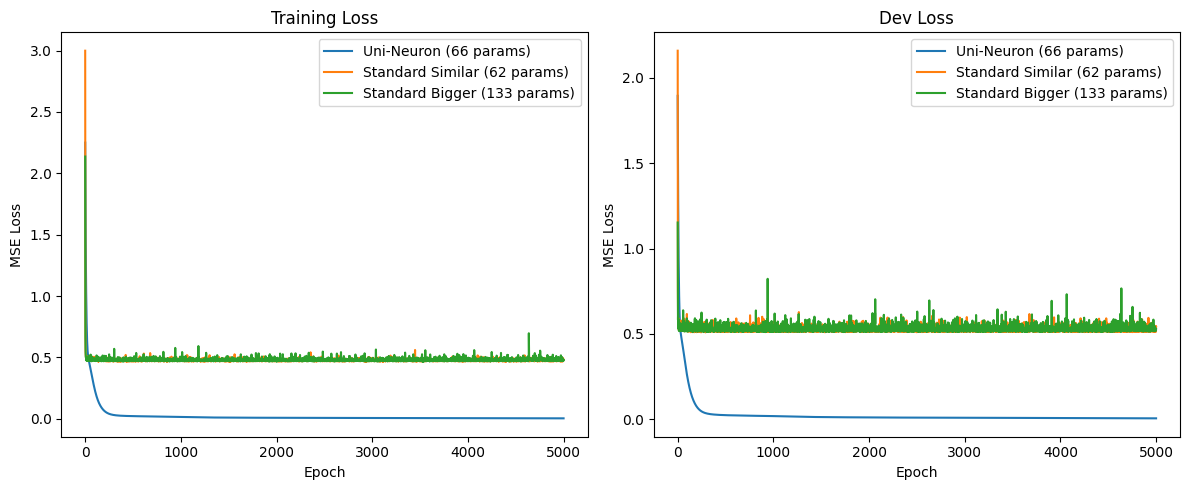

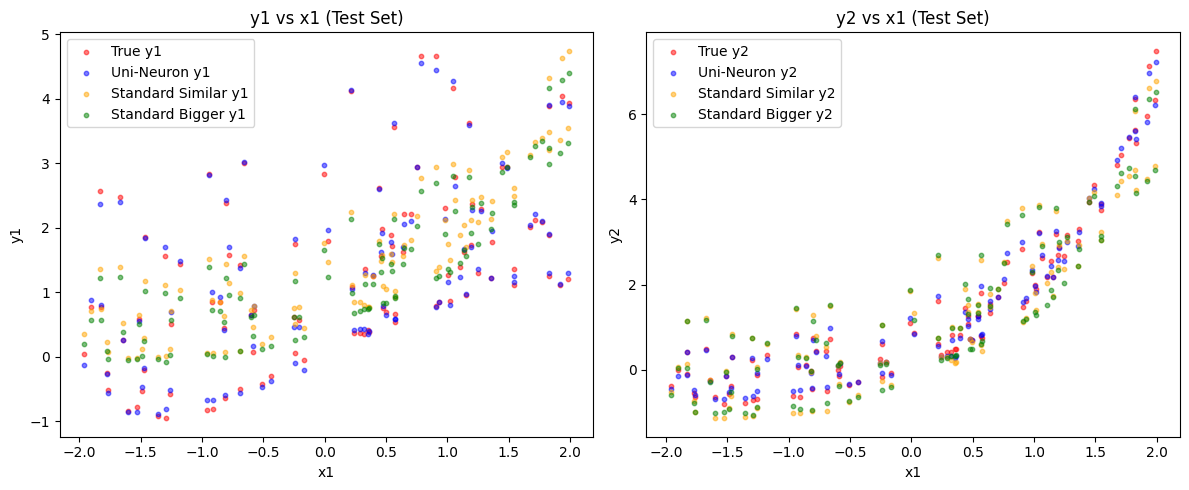


Uni-Neuron Network (66 parameters):
Training Loss: 0.0045
Dev Loss: 0.0057
Test Loss: 0.0044
Noise Robustness Loss: 0.0259
Training Time: 2.32 seconds

Standard NN Similar Size (62 parameters):
Training Loss: 0.4780
Dev Loss: 0.5445
Test Loss: 0.4509
Noise Robustness Loss: 0.2487
Training Time: 681.73 seconds

Standard NN Bigger Size (133 parameters):
Training Loss: 0.4780
Dev Loss: 0.5293
Test Loss: 0.4466
Noise Robustness Loss: 0.2472
Training Time: 776.26 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import time

# Hyperparameters
num_data = 1000
epochs = 5000
learning_rate = 0.05
use_advanced = True

# Generate synthetic data with reduced noise
np.random.seed(42)
X = np.random.uniform(-2, 2, (num_data, 2))
noise = np.random.normal(0, 0.05, (num_data, 2))
Y = np.zeros((num_data, 2))
# Clean functions with noise added once
Y[:, 0] = np.sin(X[:, 0]) + X[:, 1]**2  # No noise here
Y[:, 1] = np.exp(X[:, 0]) - np.cos(X[:, 1])  # No noise here
Y += noise  # Add noise to final outputs

# Split data
train_size = int(0.8 * num_data)
dev_size = int(0.1 * num_data)
X_train, Y_train = X[:train_size], Y[:train_size]
X_dev, Y_dev = X[train_size:train_size + dev_size], Y[train_size:train_size + dev_size]
X_test, Y_test = X[train_size + dev_size:], Y[train_size + dev_size:]

# Uni-Neuron Network (66 parameters)
class UniNeuronNetwork:
    def __init__(self):
        self.weights = {
            'in_h1': np.random.randn(2, 2) * 0.1, 'in_h2': np.random.randn(2, 4) * 0.1,
            'in_h3': np.random.randn(2, 2) * 0.1, 'in_out': np.random.randn(2, 2) * 0.1,
            'h1_h2': np.random.randn(2, 4) * 0.1, 'h1_h3': np.random.randn(2, 2) * 0.1,
            'h1_out': np.random.randn(2, 2) * 0.1, 'h2_h3': np.random.randn(4, 2) * 0.1,
            'h2_out': np.random.randn(4, 2) * 0.1, 'h3_out': np.random.randn(2, 2) * 0.1
        }
        self.biases = {
            'h1': np.zeros(2), 'h2': np.zeros(4), 'h3': np.zeros(2), 'out': np.zeros(2)
        }

    def forward(self, X):
        self.X = X
        self.z1 = X @ self.weights['in_h1'] + self.biases['h1']
        self.h1 = np.maximum(0, self.z1)
        self.z2 = X @ self.weights['in_h2'] + self.h1 @ self.weights['h1_h2'] + self.biases['h2']
        self.h2 = np.maximum(0, self.z2)
        self.z3 = X @ self.weights['in_h3'] + self.h1 @ self.weights['h1_h3'] + self.h2 @ self.weights['h2_h3'] + self.biases['h3']
        self.h3 = np.maximum(0, self.z3)
        self.out = (X @ self.weights['in_out'] + self.h1 @ self.weights['h1_out'] +
                    self.h2 @ self.weights['h2_out'] + self.h3 @ self.weights['h3_out'] + self.biases['out'])
        return self.out

    def relu_deriv(self, z):
        return np.where(z > 0, 1, 0)

    def train(self, X_train, Y_train, X_dev, Y_dev, X_test, Y_test, epochs, learning_rate):
        train_losses, dev_losses = [], []
        start_time = time.time()
        m = X_train.shape[0]

        for _ in range(epochs):
            y_pred_train = self.forward(X_train)
            train_loss = np.mean((y_pred_train - Y_train) ** 2) / 2
            train_losses.append(train_loss)

            dL_dout = (y_pred_train - Y_train) / m
            self.weights['in_out'] -= learning_rate * (self.X.T @ dL_dout)
            self.weights['h1_out'] -= learning_rate * (self.h1.T @ dL_dout)
            self.weights['h2_out'] -= learning_rate * (self.h2.T @ dL_dout)
            self.weights['h3_out'] -= learning_rate * (self.h3.T @ dL_dout)
            self.biases['out'] -= learning_rate * np.sum(dL_dout, axis=0)

            dL_dh3 = dL_dout @ self.weights['h3_out'].T * self.relu_deriv(self.z3)
            self.weights['in_h3'] -= learning_rate * (self.X.T @ dL_dh3)
            self.weights['h1_h3'] -= learning_rate * (self.h1.T @ dL_dh3)
            self.weights['h2_h3'] -= learning_rate * (self.h2.T @ dL_dh3)
            self.biases['h3'] -= learning_rate * np.sum(dL_dh3, axis=0)

            dL_dh2 = (dL_dout @ self.weights['h2_out'].T + dL_dh3 @ self.weights['h2_h3'].T) * self.relu_deriv(self.z2)
            self.weights['in_h2'] -= learning_rate * (self.X.T @ dL_dh2)
            self.weights['h1_h2'] -= learning_rate * (self.h1.T @ dL_dh2)
            self.biases['h2'] -= learning_rate * np.sum(dL_dh2, axis=0)

            dL_dh1 = (dL_dout @ self.weights['h1_out'].T + dL_dh3 @ self.weights['h1_h3'].T +
                      dL_dh2 @ self.weights['h1_h2'].T) * self.relu_deriv(self.z1)
            self.weights['in_h1'] -= learning_rate * (self.X.T @ dL_dh1)
            self.biases['h1'] -= learning_rate * np.sum(dL_dh1, axis=0)

            y_pred_dev = self.forward(X_dev)
            dev_loss = np.mean((y_pred_dev - Y_dev) ** 2) / 2
            dev_losses.append(dev_loss)

        total_time = time.time() - start_time
        y_pred_test = self.forward(X_test)
        test_loss = np.mean((y_pred_test - Y_test) ** 2) / 2
        return train_losses, dev_losses, train_losses[-1], dev_losses[-1], test_loss, total_time

# Standard NN (Similar Size, ~62 parameters)
def build_standard_nn_similar():
    model = models.Sequential([
        layers.Dense(4, activation='relu', input_shape=(2,), kernel_initializer='he_normal' if use_advanced else 'glorot_uniform'),
        layers.Dense(6, activation='relu', kernel_initializer='he_normal' if use_advanced else 'glorot_uniform'),
        layers.Dense(2, activation='relu', kernel_initializer='he_normal' if use_advanced else 'glorot_uniform'),
        layers.Dense(2)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate) if use_advanced else tf.keras.optimizers.SGD(learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Standard NN (Bigger Size, ~133 parameters)
def build_standard_nn_bigger():
    model = models.Sequential([
        layers.Dense(6, activation='relu', input_shape=(2,), kernel_initializer='he_normal' if use_advanced else 'glorot_uniform'),
        layers.Dense(8, activation='relu', kernel_initializer='he_normal' if use_advanced else 'glorot_uniform'),
        layers.Dense(4, activation='relu', kernel_initializer='he_normal' if use_advanced else 'glorot_uniform'),
        layers.Dense(3, activation='relu', kernel_initializer='he_normal' if use_advanced else 'glorot_uniform'),
        layers.Dense(2)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate) if use_advanced else tf.keras.optimizers.SGD(learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Train and evaluate
uni_net = UniNeuronNetwork()
standard_similar = build_standard_nn_similar()
standard_bigger = build_standard_nn_bigger()

# Uni-NN Training
uni_results = uni_net.train(X_train, Y_train, X_dev, Y_dev, X_test, Y_test, epochs, learning_rate)
uni_train_losses, uni_dev_losses, uni_train_loss, uni_dev_loss, uni_test_loss, uni_time = uni_results

# Standard NN Training with Time Measurement
start_time_similar = time.time()
history_similar = standard_similar.fit(X_train, Y_train, validation_data=(X_dev, Y_dev), epochs=epochs, verbose=0)
similar_time = time.time() - start_time_similar

start_time_bigger = time.time()
history_bigger = standard_bigger.fit(X_train, Y_train, validation_data=(X_dev, Y_dev), epochs=epochs, verbose=0)
bigger_time = time.time() - start_time_bigger

# Robustness Test
def robustness_test(model, X_test, Y_test, noise_std=0.1):
    X_test_noisy = X_test + np.random.normal(0, noise_std, X_test.shape)
    if isinstance(model, UniNeuronNetwork):
        y_pred_noisy = model.forward(X_test_noisy)
    else:
        y_pred_noisy = model.predict(X_test_noisy, verbose=0)
    return np.mean((y_pred_noisy - Y_test) ** 2) / 2

uni_noise_loss = robustness_test(uni_net, X_test, Y_test)
similar_noise_loss = robustness_test(standard_similar, X_test, Y_test)
bigger_noise_loss = robustness_test(standard_bigger, X_test, Y_test)

# Parameter Counts
uni_params = 66
similar_params = standard_similar.count_params()
bigger_params = standard_bigger.count_params()

# Plot Training and Dev Losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(uni_train_losses, label='Uni-Neuron (66 params)')
plt.plot(history_similar.history['loss'], label='Standard Similar (62 params)')
plt.plot(history_bigger.history['loss'], label='Standard Bigger (133 params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(uni_dev_losses, label='Uni-Neuron (66 params)')
plt.plot(history_similar.history['val_loss'], label='Standard Similar (62 params)')
plt.plot(history_bigger.history['val_loss'], label='Standard Bigger (133 params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Dev Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization using test data
x1_test = X_test[:, 0]
x2_test = X_test[:, 1]
y1_true_test = Y_test[:, 0]
y2_true_test = Y_test[:, 1]
y_test_pred_uni = uni_net.forward(X_test)
y_test_pred_similar = standard_similar.predict(X_test, verbose=0)
y_test_pred_bigger = standard_bigger.predict(X_test, verbose=0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1_test, y1_true_test, label='True y1', color='red', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_uni[:, 0], label='Uni-Neuron y1', color='blue', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_similar[:, 0], label='Standard Similar y1', color='orange', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_bigger[:, 0], label='Standard Bigger y1', color='green', alpha=0.5, s=10)
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('y1 vs x1 (Test Set)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x1_test, y2_true_test, label='True y2', color='red', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_uni[:, 1], label='Uni-Neuron y2', color='blue', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_similar[:, 1], label='Standard Similar y2', color='orange', alpha=0.5, s=10)
plt.scatter(x1_test, y_test_pred_bigger[:, 1], label='Standard Bigger y2', color='green', alpha=0.5, s=10)
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('y2 vs x1 (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

# Print Results
print("\nUni-Neuron Network (66 parameters):")
print(f"Training Loss: {uni_train_loss:.4f}")
print(f"Dev Loss: {uni_dev_loss:.4f}")
print(f"Test Loss: {uni_test_loss:.4f}")
print(f"Noise Robustness Loss: {uni_noise_loss:.4f}")
print(f"Training Time: {uni_time:.2f} seconds")

print("\nStandard NN Similar Size (62 parameters):")
print(f"Training Loss: {history_similar.history['loss'][-1]:.4f}")
print(f"Dev Loss: {history_similar.history['val_loss'][-1]:.4f}")
print(f"Test Loss: {standard_similar.evaluate(X_test, Y_test, verbose=0):.4f}")
print(f"Noise Robustness Loss: {similar_noise_loss:.4f}")
print(f"Training Time: {similar_time:.2f} seconds")

print("\nStandard NN Bigger Size (133 parameters):")
print(f"Training Loss: {history_bigger.history['loss'][-1]:.4f}")
print(f"Dev Loss: {history_bigger.history['val_loss'][-1]:.4f}")
print(f"Test Loss: {standard_bigger.evaluate(X_test, Y_test, verbose=0):.4f}")
print(f"Noise Robustness Loss: {bigger_noise_loss:.4f}")
print(f"Training Time: {bigger_time:.2f} seconds")

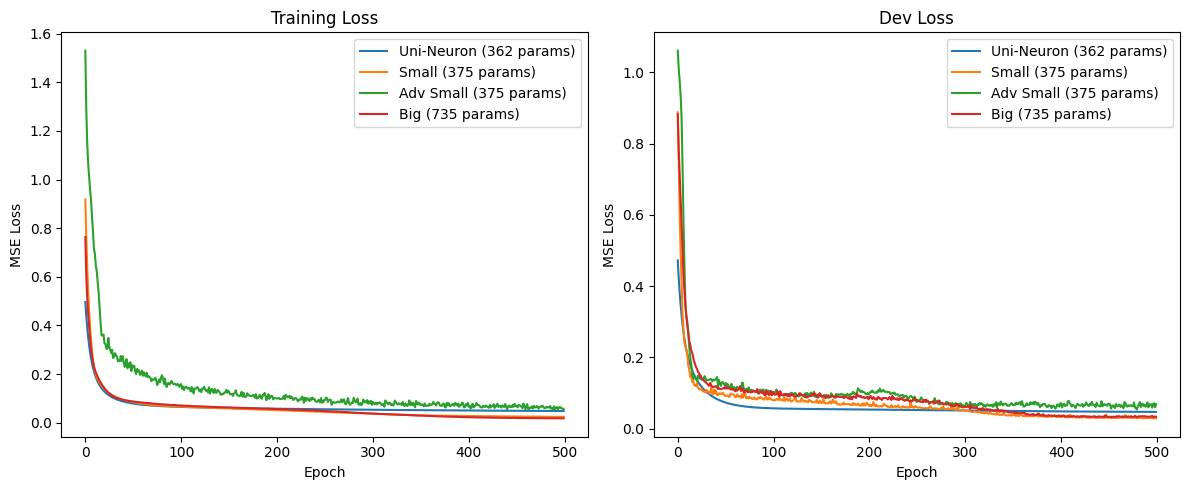

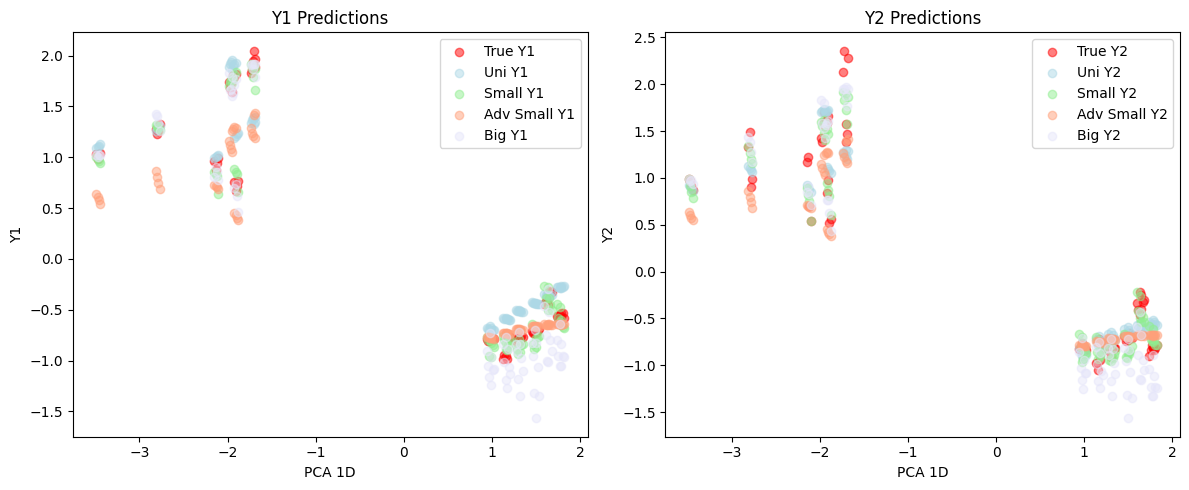


Uni-Neuron Network (362 params):
Train MSE: 0.0477, Dev MSE: 0.0470, Test MSE: 0.0386
Train MAE: 0.2190, Dev MAE: 0.2307, Test MAE: 0.2112
Train R²: 0.9025, Dev R²: 0.8999, Test R²: 0.9291
Train Residual: 0.2190, Dev Residual: 0.2307, Test Residual: 0.2112
Time: 0.33s, Latency: 0.0002s, Overfit Gap: 0.0007

Small Normal NN (375 params):
Train MSE: 0.0238, Dev MSE: 0.0291, Test MSE: 0.0097
Train MAE: 0.1073, Dev MAE: 0.1213, Test MAE: 0.1050
Train R²: 0.9764, Dev R²: 0.9691, Test R²: 0.9820
Train Residual: 0.1073, Dev Residual: 0.1213, Test Residual: 0.1050
Time: 80.55s, Latency: 0.1281s, Overfit Gap: -0.0054

Advanced Small NN (375 params):
Train MSE: 0.0549, Dev MSE: 0.0687, Test MSE: 0.0525
Train MAE: 0.1970, Dev MAE: 0.2010, Test MAE: 0.2411
Train R²: 0.9334, Dev R²: 0.9269, Test R²: 0.9035
Train Residual: 0.1970, Dev Residual: 0.2010, Test Residual: 0.2411
Time: 74.72s, Latency: 0.1236s, Overfit Gap: -0.0137

Big Normal NN (735 params):
Train MSE: 0.0177, Dev MSE: 0.0338, Test MSE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA

# Hyperparameters
LEARNING_RATE = 0.025
EPOCHS = 500
TRAIN_SIZE = 0.8
DEV_SIZE = 0.1

# Load and preprocess Energy Efficiency dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']].values  # 8 inputs
Y = data[['Y1', 'Y2']].values  # 2 outputs

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

train_size = int(TRAIN_SIZE * len(X))
dev_size = int(DEV_SIZE * len(X))
X_train, X_dev, X_test = X[:train_size], X[train_size:train_size + dev_size], X[train_size + dev_size:]
Y_train, Y_dev, Y_test = Y[:train_size], Y[train_size:train_size + dev_size], Y[train_size + dev_size:]

# Uni-Neuron Network (362 parameters)
class UniNeuronNetwork:
    def __init__(self):
        self.weights = {
            'in_h1': np.random.randn(8, 10) * 0.1, 'in_h2': np.random.randn(8, 6) * 0.1,
            'in_h3': np.random.randn(8, 4) * 0.1, 'in_out': np.random.randn(8, 2) * 0.1,
            'h1_h2': np.random.randn(10, 6) * 0.1, 'h1_h3': np.random.randn(10, 4) * 0.1,
            'h1_out': np.random.randn(10, 2) * 0.1, 'h2_h3': np.random.randn(6, 4) * 0.1,
            'h2_out': np.random.randn(6, 2) * 0.1, 'h3_out': np.random.randn(4, 2) * 0.1
        }
        self.biases = {
            'h1': np.zeros(10), 'h2': np.zeros(6), 'h3': np.zeros(4), 'out': np.zeros(2)
        }

    def forward(self, X):
        self.X = X
        self.z1 = X @ self.weights['in_h1'] + self.biases['h1']
        self.h1 = np.maximum(0, self.z1)
        self.z2 = X @ self.weights['in_h2'] + self.h1 @ self.weights['h1_h2'] + self.biases['h2']
        self.h2 = np.maximum(0, self.z2)
        self.z3 = X @ self.weights['in_h3'] + self.h1 @ self.weights['h1_h3'] + self.h2 @ self.weights['h2_h3'] + self.biases['h3']
        self.h3 = np.maximum(0, self.z3)
        self.out = (X @ self.weights['in_out'] + self.h1 @ self.weights['h1_out'] +
                    self.h2 @ self.weights['h2_out'] + self.h3 @ self.weights['h3_out'] + self.biases['out'])
        return self.out

    def relu_deriv(self, z):
        return np.where(z > 0, 1, 0)

    def train(self, X_train, Y_train, X_dev, Y_dev, X_test, Y_test, epochs, learning_rate):
        train_losses, dev_losses = [], []
        start_time = time.time()
        m = X_train.shape[0]

        for _ in range(epochs):
            y_pred_train = self.forward(X_train)
            train_loss = np.mean((y_pred_train - Y_train) ** 2) / 2
            train_losses.append(train_loss)

            dL_dout = (y_pred_train - Y_train) / m
            self.weights['in_out'] -= learning_rate * (self.X.T @ dL_dout)
            self.weights['h1_out'] -= learning_rate * (self.h1.T @ dL_dout)
            self.weights['h2_out'] -= learning_rate * (self.h2.T @ dL_dout)
            self.weights['h3_out'] -= learning_rate * (self.h3.T @ dL_dout)
            self.biases['out'] -= learning_rate * np.sum(dL_dout, axis=0)

            dL_dh3 = dL_dout @ self.weights['h3_out'].T * self.relu_deriv(self.z3)
            self.weights['in_h3'] -= learning_rate * (self.X.T @ dL_dh3)
            self.weights['h1_h3'] -= learning_rate * (self.h1.T @ dL_dh3)
            self.weights['h2_h3'] -= learning_rate * (self.h2.T @ dL_dh3)
            self.biases['h3'] -= learning_rate * np.sum(dL_dh3, axis=0)

            dL_dh2 = (dL_dout @ self.weights['h2_out'].T + dL_dh3 @ self.weights['h2_h3'].T) * self.relu_deriv(self.z2)
            self.weights['in_h2'] -= learning_rate * (self.X.T @ dL_dh2)
            self.weights['h1_h2'] -= learning_rate * (self.h1.T @ dL_dh2)
            self.biases['h2'] -= learning_rate * np.sum(dL_dh2, axis=0)

            dL_dh1 = (dL_dout @ self.weights['h1_out'].T + dL_dh3 @ self.weights['h1_h3'].T +
                      dL_dh2 @ self.weights['h1_h2'].T) * self.relu_deriv(self.z1)
            self.weights['in_h1'] -= learning_rate * (self.X.T @ dL_dh1)
            self.biases['h1'] -= learning_rate * np.sum(dL_dh1, axis=0)

            y_pred_dev = self.forward(X_dev)
            dev_loss = np.mean((y_pred_dev - Y_dev) ** 2) / 2
            dev_losses.append(dev_loss)

        total_time = time.time() - start_time
        y_pred_test = self.forward(X_test)
        test_loss = np.mean((y_pred_test - Y_test) ** 2) / 2
        return train_losses, dev_losses, train_loss, dev_loss, test_loss, total_time

# Small Normal NN (~400 parameters)
class SmallNormalNN:
    def __init__(self):
        self.model = models.Sequential([
            layers.Input(shape=(8,)),
            layers.Dense(15, activation='relu'),
            layers.Dense(10, activation='relu'),
            layers.Dense(6, activation='relu'),
            layers.Dense(2)
        ])
        self.model.compile(optimizer='sgd', loss='mse')

    def forward(self, X):
        return self.model.predict(X, verbose=0)

    def train(self, X_train, Y_train, X_dev, Y_dev, epochs):
        start_time = time.time()
        history = self.model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_dev, Y_dev), verbose=0)
        total_time = time.time() - start_time
        return history.history['loss'], history.history['val_loss'], total_time

# Advanced Small NN (~400 parameters with enhancements)
class AdvancedSmallNN:
    def __init__(self):
        self.model = models.Sequential([
            layers.Input(shape=(8,)),
            layers.Dense(15, activation='relu', kernel_initializer='he_normal'),
            layers.Dropout(0.2),
            layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
            layers.Dropout(0.2),
            layers.Dense(6, activation='relu', kernel_initializer='he_normal'),
            layers.Dense(2)
        ])
        self.model.compile(optimizer='adam', loss='mse')

    def forward(self, X):
        return self.model.predict(X, verbose=0)

    def train(self, X_train, Y_train, X_dev, Y_dev, epochs):
        start_time = time.time()
        history = self.model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_dev, Y_dev), verbose=0)
        total_time = time.time() - start_time
        return history.history['loss'], history.history['val_loss'], total_time

# Big Normal NN (~735 parameters)
class BigNormalNN:
    def __init__(self):
        self.model = models.Sequential([
            layers.Input(shape=(8,)),
            layers.Dense(20, activation='relu'),
            layers.Dense(15, activation='relu'),
            layers.Dense(10, activation='relu'),
            layers.Dense(6, activation='relu'),
            layers.Dense(2)
        ])
        self.model.compile(optimizer='sgd', loss='mse')

    def forward(self, X):
        return self.model.predict(X, verbose=0)

    def train(self, X_train, Y_train, X_dev, Y_dev, epochs):
        start_time = time.time()
        history = self.model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_dev, Y_dev), verbose=0)
        total_time = time.time() - start_time
        return history.history['loss'], history.history['val_loss'], total_time

# Initialize networks
uni_net = UniNeuronNetwork()
small_net = SmallNormalNN()
adv_small_net = AdvancedSmallNN()
big_net = BigNormalNN()

# Train networks
uni_results = uni_net.train(X_train, Y_train, X_dev, Y_dev, X_test, Y_test, EPOCHS, LEARNING_RATE)
uni_train_losses, uni_dev_losses, uni_train_loss, uni_dev_loss, uni_test_loss, uni_time = uni_results

small_train_losses, small_dev_losses, small_time = small_net.train(X_train, Y_train, X_dev, Y_dev, EPOCHS)
small_train_loss, small_dev_loss = small_train_losses[-1], small_dev_losses[-1]
small_test_pred = small_net.forward(X_test)
small_test_loss = np.mean((small_test_pred - Y_test) ** 2) / 2

adv_small_train_losses, adv_small_dev_losses, adv_small_time = adv_small_net.train(X_train, Y_train, X_dev, Y_dev, EPOCHS)
adv_small_train_loss, adv_small_dev_loss = adv_small_train_losses[-1], adv_small_dev_losses[-1]
adv_small_test_pred = adv_small_net.forward(X_test)
adv_small_test_loss = np.mean((adv_small_test_pred - Y_test) ** 2) / 2

big_train_losses, big_dev_losses, big_time = big_net.train(X_train, Y_train, X_dev, Y_dev, EPOCHS)
big_train_loss, big_dev_loss = big_train_losses[-1], big_dev_losses[-1]
big_test_pred = big_net.forward(X_test)
big_test_loss = np.mean((big_test_pred - Y_test) ** 2) / 2

# Calculate additional metrics
def compute_metrics(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    residuals = np.mean(np.abs(y_true - y_pred))
    return mae, r2, residuals

uni_train_mae, uni_train_r2, uni_train_res = compute_metrics(Y_train, uni_net.forward(X_train), "Uni Train")
uni_dev_mae, uni_dev_r2, uni_dev_res = compute_metrics(Y_dev, uni_net.forward(X_dev), "Uni Dev")
uni_test_mae, uni_test_r2, uni_test_res = compute_metrics(Y_test, uni_net.forward(X_test), "Uni Test")

small_train_mae, small_train_r2, small_train_res = compute_metrics(Y_train, small_net.forward(X_train), "Small Train")
small_dev_mae, small_dev_r2, small_dev_res = compute_metrics(Y_dev, small_net.forward(X_dev), "Small Dev")
small_test_mae, small_test_r2, small_test_res = compute_metrics(Y_test, small_test_pred, "Small Test")

adv_small_train_mae, adv_small_train_r2, adv_small_train_res = compute_metrics(Y_train, adv_small_net.forward(X_train), "Adv Small Train")
adv_small_dev_mae, adv_small_dev_r2, adv_small_dev_res = compute_metrics(Y_dev, adv_small_net.forward(X_dev), "Adv Small Dev")
adv_small_test_mae, adv_small_test_r2, adv_small_test_res = compute_metrics(Y_test, adv_small_test_pred, "Adv Small Test")

big_train_mae, big_train_r2, big_train_res = compute_metrics(Y_train, big_net.forward(X_train), "Big Train")
big_dev_mae, big_dev_r2, big_dev_res = compute_metrics(Y_dev, big_net.forward(X_dev), "Big Dev")
big_test_mae, big_test_r2, big_test_res = compute_metrics(Y_test, big_test_pred, "Big Test")

# Prediction latency
def measure_latency(net, X_test, name):
    start = time.time()
    net.forward(X_test)
    return time.time() - start

uni_latency = measure_latency(uni_net, X_test, "Uni")
small_latency = measure_latency(small_net, X_test, "Small")
adv_small_latency = measure_latency(adv_small_net, X_test, "Adv Small")
big_latency = measure_latency(big_net, X_test, "Big")

# Parameter counts
uni_params = 362  # As calculated
small_params = small_net.model.count_params()
adv_small_params = adv_small_net.model.count_params()
big_params = big_net.model.count_params()

# Overfitting check
uni_overfit = uni_train_loss - uni_dev_loss
small_overfit = small_train_loss - small_dev_loss
adv_small_overfit = adv_small_train_loss - adv_small_dev_loss
big_overfit = big_train_loss - big_dev_loss

# Learning curve plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(uni_train_losses, label=f'Uni-Neuron ({uni_params} params)')
plt.plot(small_train_losses, label=f'Small ({small_params} params)')
plt.plot(adv_small_train_losses, label=f'Adv Small ({adv_small_params} params)')
plt.plot(big_train_losses, label=f'Big ({big_params} params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(uni_dev_losses, label=f'Uni-Neuron ({uni_params} params)')
plt.plot(small_dev_losses, label=f'Small ({small_params} params)')
plt.plot(adv_small_dev_losses, label=f'Adv Small ({adv_small_params} params)')
plt.plot(big_dev_losses, label=f'Big ({big_params} params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Dev Loss')
plt.legend()
plt.tight_layout()
plt.show()

# True vs Predicted with PCA
pca = PCA(n_components=1)
X_test_1d = pca.fit_transform(X_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test_1d, Y_test[:, 0], label='True Y1', color='red', alpha=0.5)
plt.scatter(X_test_1d, uni_net.forward(X_test)[:, 0], label='Uni Y1', color='lightblue', alpha=0.5)
plt.scatter(X_test_1d, small_test_pred[:, 0], label='Small Y1', color='lightgreen', alpha=0.5)
plt.scatter(X_test_1d, adv_small_test_pred[:, 0], label='Adv Small Y1', color='lightsalmon', alpha=0.5)
plt.scatter(X_test_1d, big_test_pred[:, 0], label='Big Y1', color='lavender', alpha=0.5)
plt.xlabel('PCA 1D')
plt.ylabel('Y1')
plt.title('Y1 Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_1d, Y_test[:, 1], label='True Y2', color='red', alpha=0.5)
plt.scatter(X_test_1d, uni_net.forward(X_test)[:, 1], label='Uni Y2', color='lightblue', alpha=0.5)
plt.scatter(X_test_1d, small_test_pred[:, 1], label='Small Y2', color='lightgreen', alpha=0.5)
plt.scatter(X_test_1d, adv_small_test_pred[:, 1], label='Adv Small Y2', color='lightsalmon', alpha=0.5)
plt.scatter(X_test_1d, big_test_pred[:, 1], label='Big Y2', color='lavender', alpha=0.5)
plt.xlabel('PCA 1D')
plt.ylabel('Y2')
plt.title('Y2 Predictions')
plt.legend()
plt.tight_layout()
plt.show()

# Print results
print("\nUni-Neuron Network (362 params):")
print(f"Train MSE: {uni_train_loss:.4f}, Dev MSE: {uni_dev_loss:.4f}, Test MSE: {uni_test_loss:.4f}")
print(f"Train MAE: {uni_train_mae:.4f}, Dev MAE: {uni_dev_mae:.4f}, Test MAE: {uni_test_mae:.4f}")
print(f"Train R²: {uni_train_r2:.4f}, Dev R²: {uni_dev_r2:.4f}, Test R²: {uni_test_r2:.4f}")
print(f"Train Residual: {uni_train_res:.4f}, Dev Residual: {uni_dev_res:.4f}, Test Residual: {uni_test_res:.4f}")
print(f"Time: {uni_time:.2f}s, Latency: {uni_latency:.4f}s, Overfit Gap: {uni_overfit:.4f}")

print("\nSmall Normal NN (375 params):")
print(f"Train MSE: {small_train_loss:.4f}, Dev MSE: {small_dev_loss:.4f}, Test MSE: {small_test_loss:.4f}")
print(f"Train MAE: {small_train_mae:.4f}, Dev MAE: {small_dev_mae:.4f}, Test MAE: {small_test_mae:.4f}")
print(f"Train R²: {small_train_r2:.4f}, Dev R²: {small_dev_r2:.4f}, Test R²: {small_test_r2:.4f}")
print(f"Train Residual: {small_train_res:.4f}, Dev Residual: {small_dev_res:.4f}, Test Residual: {small_test_res:.4f}")
print(f"Time: {small_time:.2f}s, Latency: {small_latency:.4f}s, Overfit Gap: {small_overfit:.4f}")

print("\nAdvanced Small NN (375 params):")
print(f"Train MSE: {adv_small_train_loss:.4f}, Dev MSE: {adv_small_dev_loss:.4f}, Test MSE: {adv_small_test_loss:.4f}")
print(f"Train MAE: {adv_small_train_mae:.4f}, Dev MAE: {adv_small_dev_mae:.4f}, Test MAE: {adv_small_test_mae:.4f}")
print(f"Train R²: {adv_small_train_r2:.4f}, Dev R²: {adv_small_dev_r2:.4f}, Test R²: {adv_small_test_r2:.4f}")
print(f"Train Residual: {adv_small_train_res:.4f}, Dev Residual: {adv_small_dev_res:.4f}, Test Residual: {adv_small_test_res:.4f}")
print(f"Time: {adv_small_time:.2f}s, Latency: {adv_small_latency:.4f}s, Overfit Gap: {adv_small_overfit:.4f}")

print("\nBig Normal NN (735 params):")
print(f"Train MSE: {big_train_loss:.4f}, Dev MSE: {big_dev_loss:.4f}, Test MSE: {big_test_loss:.4f}")
print(f"Train MAE: {big_train_mae:.4f}, Dev MAE: {big_dev_mae:.4f}, Test MAE: {big_test_mae:.4f}")
print(f"Train R²: {big_train_r2:.4f}, Dev R²: {big_dev_r2:.4f}, Test R²: {big_test_r2:.4f}")
print(f"Train Residual: {big_train_res:.4f}, Dev Residual: {big_dev_res:.4f}, Test Residual: {big_test_res:.4f}")
print(f"Time: {big_time:.2f}s, Latency: {big_latency:.4f}s, Overfit Gap: {big_overfit:.4f}")

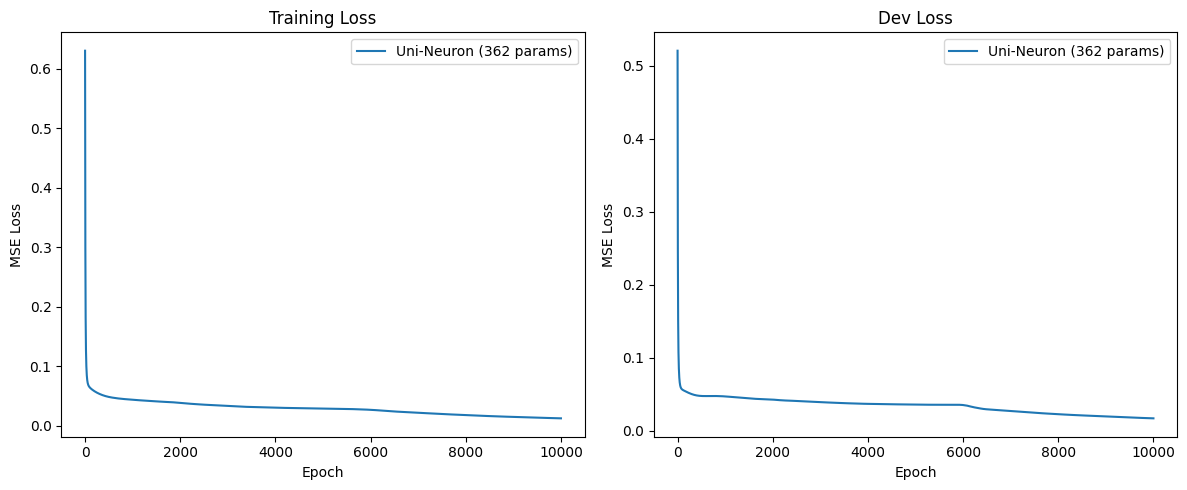

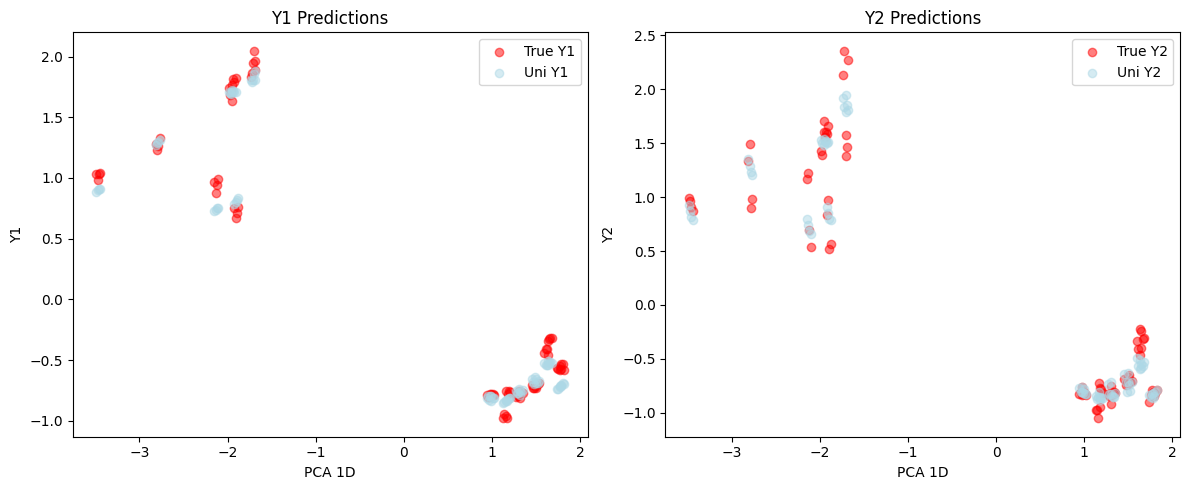


Uni-Neuron Network (362 params):
Train MSE: 0.0121, Dev MSE: 0.0168, Test MSE: 0.0106
Train MAE: 0.1121, Dev MAE: 0.1367, Test MAE: 0.1045
Train R²: 0.9753, Dev R²: 0.9644, Test R²: 0.9804
Train Residual: 0.1121, Dev Residual: 0.1367, Test Residual: 0.1045
Time: 7.64s, Latency: 0.0001s, Overfit Gap: -0.0047


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA

# Hyperparameters
LEARNING_RATE = 0.025
EPOCHS = 10000
TRAIN_SIZE = 0.8
DEV_SIZE = 0.1

# Load and preprocess Energy Efficiency dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']].values  # 8 inputs
Y = data[['Y1', 'Y2']].values  # 2 outputs

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

train_size = int(TRAIN_SIZE * len(X))
dev_size = int(DEV_SIZE * len(X))
X_train, X_dev, X_test = X[:train_size], X[train_size:train_size + dev_size], X[train_size + dev_size:]
Y_train, Y_dev, Y_test = Y[:train_size], Y[train_size:train_size + dev_size], Y[train_size + dev_size:]

# Uni-Neuron Network (362 parameters)
class UniNeuronNetwork:
    def __init__(self):
        self.weights = {
            'in_h1': np.random.randn(8, 10) * 0.1, 'in_h2': np.random.randn(8, 6) * 0.1,
            'in_h3': np.random.randn(8, 4) * 0.1, 'in_out': np.random.randn(8, 2) * 0.1,
            'h1_h2': np.random.randn(10, 6) * 0.1, 'h1_h3': np.random.randn(10, 4) * 0.1,
            'h1_out': np.random.randn(10, 2) * 0.1, 'h2_h3': np.random.randn(6, 4) * 0.1,
            'h2_out': np.random.randn(6, 2) * 0.1, 'h3_out': np.random.randn(4, 2) * 0.1
        }
        self.biases = {
            'h1': np.zeros(10), 'h2': np.zeros(6), 'h3': np.zeros(4), 'out': np.zeros(2)
        }

    def forward(self, X):
        self.X = X
        self.z1 = X @ self.weights['in_h1'] + self.biases['h1']
        self.h1 = np.maximum(0, self.z1)
        self.z2 = X @ self.weights['in_h2'] + self.h1 @ self.weights['h1_h2'] + self.biases['h2']
        self.h2 = np.maximum(0, self.z2)
        self.z3 = X @ self.weights['in_h3'] + self.h1 @ self.weights['h1_h3'] + self.h2 @ self.weights['h2_h3'] + self.biases['h3']
        self.h3 = np.maximum(0, self.z3)
        self.out = (X @ self.weights['in_out'] + self.h1 @ self.weights['h1_out'] +
                    self.h2 @ self.weights['h2_out'] + self.h3 @ self.weights['h3_out'] + self.biases['out'])
        return self.out

    def relu_deriv(self, z):
        return np.where(z > 0, 1, 0)

    def train(self, X_train, Y_train, X_dev, Y_dev, X_test, Y_test, epochs, learning_rate):
        train_losses, dev_losses = [], []
        start_time = time.time()
        m = X_train.shape[0]

        for _ in range(epochs):
            y_pred_train = self.forward(X_train)
            train_loss = np.mean((y_pred_train - Y_train) ** 2) / 2
            train_losses.append(train_loss)

            dL_dout = (y_pred_train - Y_train) / m
            self.weights['in_out'] -= learning_rate * (self.X.T @ dL_dout)
            self.weights['h1_out'] -= learning_rate * (self.h1.T @ dL_dout)
            self.weights['h2_out'] -= learning_rate * (self.h2.T @ dL_dout)
            self.weights['h3_out'] -= learning_rate * (self.h3.T @ dL_dout)
            self.biases['out'] -= learning_rate * np.sum(dL_dout, axis=0)

            dL_dh3 = dL_dout @ self.weights['h3_out'].T * self.relu_deriv(self.z3)
            self.weights['in_h3'] -= learning_rate * (self.X.T @ dL_dh3)
            self.weights['h1_h3'] -= learning_rate * (self.h1.T @ dL_dh3)
            self.weights['h2_h3'] -= learning_rate * (self.h2.T @ dL_dh3)
            self.biases['h3'] -= learning_rate * np.sum(dL_dh3, axis=0)

            dL_dh2 = (dL_dout @ self.weights['h2_out'].T + dL_dh3 @ self.weights['h2_h3'].T) * self.relu_deriv(self.z2)
            self.weights['in_h2'] -= learning_rate * (self.X.T @ dL_dh2)
            self.weights['h1_h2'] -= learning_rate * (self.h1.T @ dL_dh2)
            self.biases['h2'] -= learning_rate * np.sum(dL_dh2, axis=0)

            dL_dh1 = (dL_dout @ self.weights['h1_out'].T + dL_dh3 @ self.weights['h1_h3'].T +
                      dL_dh2 @ self.weights['h1_h2'].T) * self.relu_deriv(self.z1)
            self.weights['in_h1'] -= learning_rate * (self.X.T @ dL_dh1)
            self.biases['h1'] -= learning_rate * np.sum(dL_dh1, axis=0)

            y_pred_dev = self.forward(X_dev)
            dev_loss = np.mean((y_pred_dev - Y_dev) ** 2) / 2
            dev_losses.append(dev_loss)

        total_time = time.time() - start_time
        y_pred_test = self.forward(X_test)
        test_loss = np.mean((y_pred_test - Y_test) ** 2) / 2
        return train_losses, dev_losses, train_loss, dev_loss, test_loss, total_time


# Initialize networks
uni_net = UniNeuronNetwork()

# Train networks
uni_results = uni_net.train(X_train, Y_train, X_dev, Y_dev, X_test, Y_test, EPOCHS, LEARNING_RATE)
uni_train_losses, uni_dev_losses, uni_train_loss, uni_dev_loss, uni_test_loss, uni_time = uni_results

# Calculate additional metrics
def compute_metrics(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    residuals = np.mean(np.abs(y_true - y_pred))
    return mae, r2, residuals

uni_train_mae, uni_train_r2, uni_train_res = compute_metrics(Y_train, uni_net.forward(X_train), "Uni Train")
uni_dev_mae, uni_dev_r2, uni_dev_res = compute_metrics(Y_dev, uni_net.forward(X_dev), "Uni Dev")
uni_test_mae, uni_test_r2, uni_test_res = compute_metrics(Y_test, uni_net.forward(X_test), "Uni Test")

# Prediction latency
def measure_latency(net, X_test, name):
    start = time.time()
    net.forward(X_test)
    return time.time() - start

uni_latency = measure_latency(uni_net, X_test, "Uni")

# Parameter counts
uni_params = 362  # As calculated

# Overfitting check
uni_overfit = uni_train_loss - uni_dev_loss

# Learning curve plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(uni_train_losses, label=f'Uni-Neuron ({uni_params} params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(uni_dev_losses, label=f'Uni-Neuron ({uni_params} params)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Dev Loss')
plt.legend()
plt.tight_layout()
plt.show()

# True vs Predicted with PCA
pca = PCA(n_components=1)
X_test_1d = pca.fit_transform(X_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test_1d, Y_test[:, 0], label='True Y1', color='red', alpha=0.5)
plt.scatter(X_test_1d, uni_net.forward(X_test)[:, 0], label='Uni Y1', color='lightblue', alpha=0.5)
plt.xlabel('PCA 1D')
plt.ylabel('Y1')
plt.title('Y1 Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_1d, Y_test[:, 1], label='True Y2', color='red', alpha=0.5)
plt.scatter(X_test_1d, uni_net.forward(X_test)[:, 1], label='Uni Y2', color='lightblue', alpha=0.5)
plt.xlabel('PCA 1D')
plt.ylabel('Y2')
plt.title('Y2 Predictions')
plt.legend()
plt.tight_layout()
plt.show()

# Print results
print("\nUni-Neuron Network (362 params):")
print(f"Train MSE: {uni_train_loss:.4f}, Dev MSE: {uni_dev_loss:.4f}, Test MSE: {uni_test_loss:.4f}")
print(f"Train MAE: {uni_train_mae:.4f}, Dev MAE: {uni_dev_mae:.4f}, Test MAE: {uni_test_mae:.4f}")
print(f"Train R²: {uni_train_r2:.4f}, Dev R²: {uni_dev_r2:.4f}, Test R²: {uni_test_r2:.4f}")
print(f"Train Residual: {uni_train_res:.4f}, Dev Residual: {uni_dev_res:.4f}, Test Residual: {uni_test_res:.4f}")
print(f"Time: {uni_time:.2f}s, Latency: {uni_latency:.4f}s, Overfit Gap: {uni_overfit:.4f}")
